# Predictive Model

In [1]:
# imports

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\bhush\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# get current working directory


df = pd.read_csv(r"D:\Bhushan\Data Science\ML\British Airways\Data\filtered_customer_booking.csv")

In [3]:
df.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


## One hot encoding for categorical attributes

In [6]:
df_final = df

In [7]:
encoded_trip_type=pd.get_dummies(df_final['trip_type'])
encoded_trip_type.head()

,CircleTrip,OneWay,RoundTrip
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [8]:
df_final=pd.concat([df_final,encoded_trip_type],axis=1)

In [9]:
df_final

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,CircleTrip,OneWay,RoundTrip
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,0,0,1
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,0,0,1
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,0,0,1
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,0,0,1


In [10]:
encoded_sales_channel=pd.get_dummies(df_final["sales_channel"])
encoded_sales_channel.head()

,Internet,Mobile
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [11]:
df_final=pd.concat([df_final,encoded_sales_channel],axis=1)

In [12]:
df_final

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,CircleTrip,OneWay,RoundTrip,Internet,Mobile
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,1,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,1,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1,1,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,1,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,0,0,1,1,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,0,0,1,1,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,0,0,1,1,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,0,0,1,1,0


In [13]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [14]:
#store the label for supervised learning
label = df['booking_complete']

In [17]:
df_final = df_final.drop('booking_complete', axis=1)

In [18]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,CircleTrip,OneWay,RoundTrip,Internet,Mobile
0,2,262,19,7,6,1,0,0,5.52,0,0,1,1,0
1,1,112,20,3,6,0,0,0,5.52,0,0,1,1,0
2,2,243,22,17,3,1,1,0,5.52,0,0,1,1,0
3,1,96,31,4,6,0,0,1,5.52,0,0,1,1,0
4,2,68,22,15,3,1,0,1,5.52,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,0,0,1,1,0
49978,1,111,6,4,7,0,0,0,5.62,0,0,1,1,0
49979,1,24,6,22,6,0,0,1,5.62,0,0,1,1,0
49980,1,15,6,11,1,1,0,1,5.62,0,0,1,1,0


In [20]:
label.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

## Normalizaing the values

In [21]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [23]:
#create a dataframe of scaled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [24]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [25]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,CircleTrip,OneWay,RoundTrip,Internet,Mobile,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0


## Correlation Matrix

<AxesSubplot:>

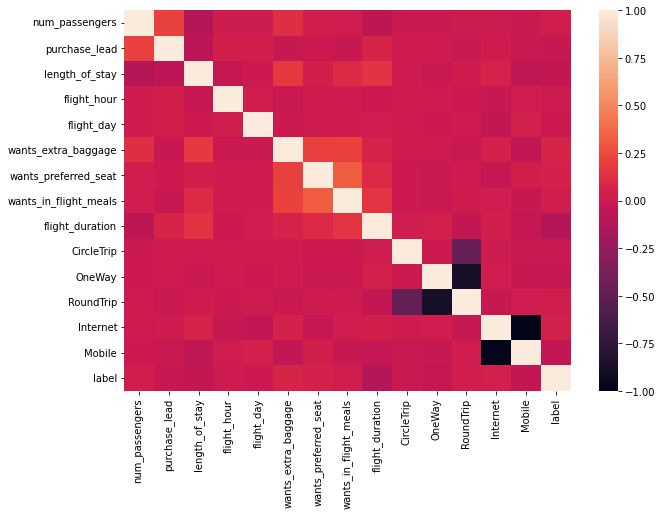

In [26]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

sns.heatmap(corr)

In [27]:
corr

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,CircleTrip,OneWay,RoundTrip,Internet,Mobile,label
num_passengers,1.000000,0.213295,-0.115883,0.015610,0.015412,0.120397,0.028602,0.022904,-0.063254,-0.001048,-0.002186,0.002425,0.002347,-0.002347,0.024012
purchase_lead,0.213295,1.000000,-0.076644,0.035239,0.036362,-0.021014,-0.003426,-0.022520,0.067437,0.005652,0.006673,-0.008585,0.013494,-0.013494,-0.022236
length_of_stay,-0.115883,-0.076644,1.000000,-0.024826,-0.000325,0.176685,0.032198,0.098835,0.141188,0.003099,-0.013059,0.009975,0.060323,-0.060323,-0.042452
flight_hour,0.015610,0.035239,-0.024826,1.000000,0.023972,-0.011464,0.012278,0.013106,-0.002295,0.000954,0.003066,-0.003153,-0.022275,0.022275,0.007260
flight_day,0.015412,0.036362,-0.000325,0.023972,1.000000,-0.002626,0.005378,0.009172,0.018326,0.004078,-0.002419,0.000158,-0.042098,0.042098,-0.006963
wants_extra_baggage,0.120397,-0.021014,0.176685,-0.011464,-0.002626,1.000000,0.207572,0.216465,0.057120,0.011847,0.007830,-0.012588,0.054174,-0.054174,0.068116
wants_preferred_seat,0.028602,-0.003426,0.032198,0.012278,0.005378,0.207572,1.000000,0.315165,0.101380,-0.000416,-0.007971,0.007200,-0.032966,0.032966,0.050121
wants_in_flight_meals,0.022904,-0.022520,0.098835,0.013106,0.009172,0.216465,0.315165,1.000000,0.154411,-0.002986,-0.014450,0.014129,0.022157,-0.022157,0.026361
flight_duration,-0.063254,0.067437,0.141188,-0.002295,0.018326,0.057120,0.101380,0.154411,1.000000,0.015708,0.040688,-0.043304,0.038627,-0.038627,-0.106287
CircleTrip,-0.001048,0.005652,0.003099,0.000954,0.004078,0.011847,-0.000416,-0.002986,0.015708,1.000000,-0.004261,-0.478358,0.011894,-0.011894,-0.014398


Splitting the dataset into train and  test data.

In [31]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [39]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

## Random Forest Classifier

In [40]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

## Checking Training accuracy

In [41]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy, precision and f1-score for training data are 0.93, 0.98 and 0.71 respectively


0.9313742653495061

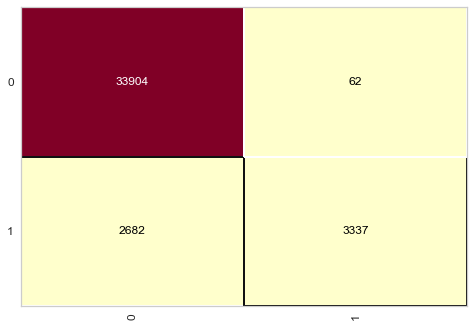

In [42]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

In [43]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy, precision and f1-score for training data are 0.85, 0.42 and 0.12 respectively


0.8500550165049515

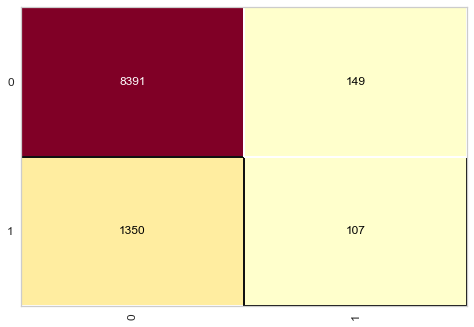

In [44]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

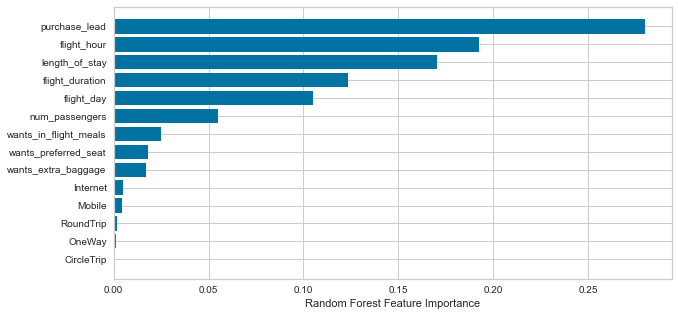

In [45]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

## Balancing the dataset

In [46]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [47]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [48]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [49]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,CircleTrip,OneWay,RoundTrip,Internet,Mobile,label
0,-0.579424,-0.775721,0.234662,1.465988,-1.412280,-1.421288,-0.650054,-0.863557,1.037314,-0.048231,-0.088336,0.100826,0.355786,-0.355786,1
1,-0.579424,0.792298,-0.119401,0.911715,-1.412280,0.703587,-0.650054,-0.863557,1.037314,-0.048231,-0.088336,0.100826,0.355786,-0.355786,1
2,-0.579424,1.070316,1.886956,-1.305376,-0.910449,0.703587,-0.650054,1.158002,1.037314,-0.048231,-0.088336,0.100826,0.355786,-0.355786,1
3,-0.579424,0.469798,-0.178411,1.281231,-0.910449,0.703587,-0.650054,1.158002,1.037314,-0.048231,-0.088336,0.100826,-2.810681,2.810681,1
4,-0.579424,-0.475462,-0.178411,0.911715,-0.910449,-1.421288,-0.650054,-0.863557,1.037314,-0.048231,-0.088336,0.100826,0.355786,-0.355786,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,0.400769,-0.397617,-0.561979,1.096473,0.595045,0.703587,1.538334,1.158002,-1.741921,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
15472,0.400769,1.937731,-0.502969,1.096473,1.096876,-1.421288,-0.650054,-0.863557,-1.474687,-0.048231,-0.088336,0.100826,-2.810681,2.810681,0
15473,-0.579424,0.147298,0.175652,1.465988,-0.910449,0.703587,-0.650054,-0.863557,1.037314,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
15474,-0.579424,-0.831324,-0.591484,1.281231,-1.412280,-1.421288,-0.650054,-0.863557,-0.185282,-0.048231,-0.088336,0.100826,-2.810681,2.810681,0


In [50]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [51]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,CircleTrip,OneWay,RoundTrip,Internet,Mobile,label
0,-0.579424,-0.931411,1.650914,1.650746,1.598707,0.703587,-0.650054,-0.863557,0.195526,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
1,0.400769,1.092557,-0.532474,1.465988,-0.408618,0.703587,-0.650054,-0.863557,-0.439155,-0.048231,-0.088336,0.100826,0.355786,-0.355786,1
2,0.400769,2.338076,-0.178411,0.172685,0.595045,0.703587,-0.650054,1.158002,-0.185282,-0.048231,-0.088336,0.100826,0.355786,-0.355786,1
3,-0.579424,0.558764,6.873341,0.726958,1.598707,0.703587,1.538334,-0.863557,0.870293,-0.048231,-0.088336,0.100826,0.355786,-0.355786,1
4,-0.579424,0.269625,0.057631,-0.196830,1.096876,0.703587,1.538334,1.158002,0.195526,-0.048231,-0.088336,0.100826,0.355786,-0.355786,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,0.400769,0.503160,0.146147,0.172685,0.093214,0.703587,-0.650054,-0.863557,1.037314,-0.048231,-0.088336,0.100826,0.355786,-0.355786,1
15472,1.380962,-0.931411,-0.591484,1.096473,1.096876,0.703587,1.538334,1.158002,1.037314,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0
15473,-0.579424,-0.931411,-0.532474,-1.120618,0.595045,0.703587,1.538334,1.158002,-1.300985,-0.048231,-0.088336,0.100826,0.355786,-0.355786,1
15474,2.361155,-0.386496,0.264168,-1.305376,-0.910449,0.703587,-0.650054,1.158002,-1.107240,-0.048231,-0.088336,0.100826,0.355786,-0.355786,0


In [52]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [53]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [54]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.62, 0.61, 0.6, 0.65 and 0.6 respectively


0.6224160206718347

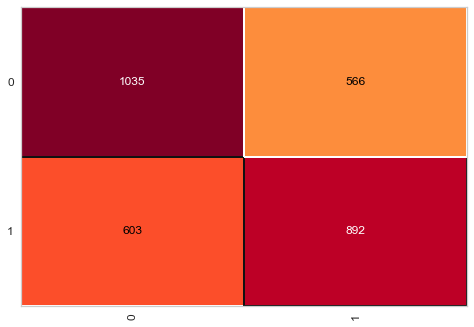

In [55]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

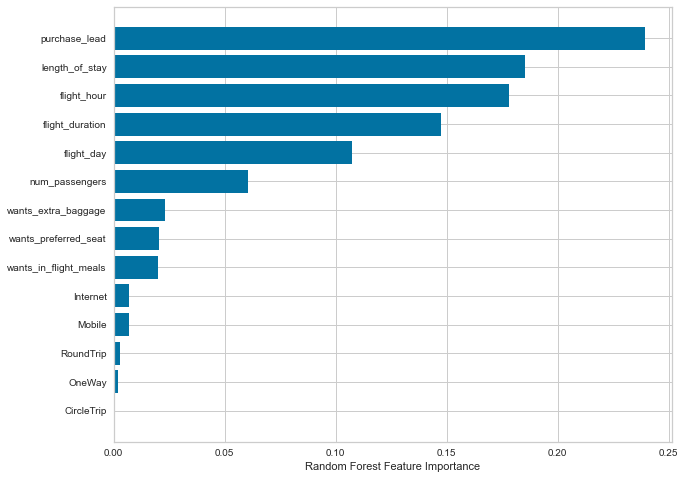

In [56]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")